# 0* Installing and importing modules and libraries

## 0.1 Pip

In [7]:
# pip install scratch
pip install html5lib
pip install python-dateutil
pip install tqdm

SyntaxError: invalid syntax (1323208391.py, line 1)

## 0.2 Modules and Libraries

In [724]:
from collections import Counter, namedtuple
from typing import List, Tuple, Callable, TypeVar, Iterator, NamedTuple, Optional
from matplotlib import pyplot as plt
import math
import random
import scratch
import enum
from bs4 import BeautifulSoup
import requests
import json
from dataclasses import dataclass
from dateutil.parser import parse
import tqdm

# 3 __Visualizing Data__

## 3.1 Matplotlib

In [1]:
from matplotlib import pyplot as plt

In [22]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

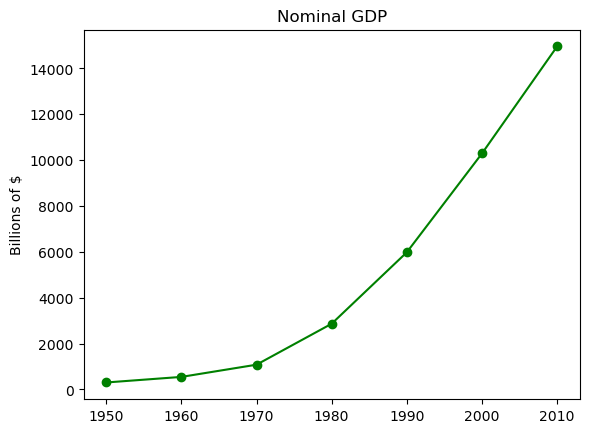

In [36]:
plt.plot(years, gdp, color = 'green', marker = 'o', linestyle = 'solid')

plt.title('Nominal GDP')
plt.ylabel('Billions of $')
plt.show()

## 3.2 Bar Charts

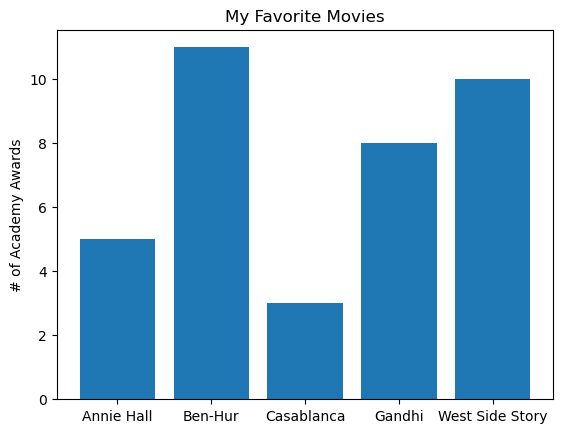

In [43]:
movies = ['Annie Hall', 'Ben-Hur', 'Casablanca', 'Gandhi', 'West Side Story']
num_oscars = [5, 11, 3, 8, 10]
plt.bar(range(len(movies)), num_oscars)

plt.ylabel('# of Academy Awards')
plt.title('My Favorite Movies')
plt.xticks(range(len(movies)), movies)

plt.show()

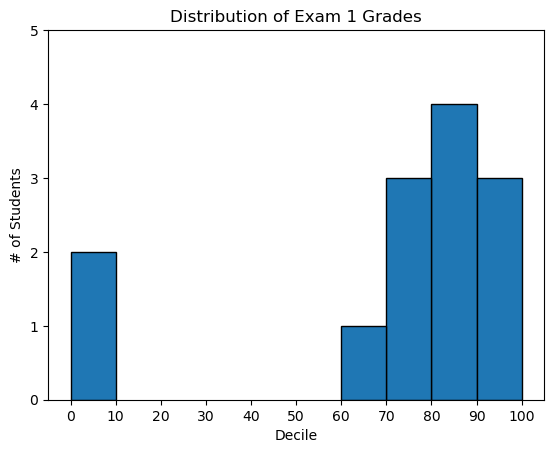

In [56]:
from collections import Counter

grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)

plt.bar([x + 5 for x in histogram.keys()], # shift each bar to the left by 4
        histogram.values(),                # give each bar a correct height
        10,                                # give each bar a width of 10
        edgecolor = (0, 0, 0))             # black edges for each bar

plt.axis([-5, 105, 0, 5])                  # X axis from -5 to 105
                                           # Y axis from 0 to 5
plt.xticks([10 * i for i in range(11)])    # X axis labels 0, 10, 20, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

## 3.3 Line Charts

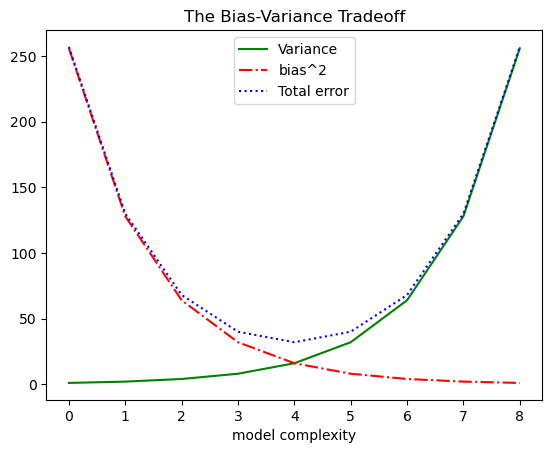

In [58]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]       # Variance
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]   # Bias Square

total_error = [x + y for x, y in zip(variance, bias_squared)] # Total error
xs = [i for i, _ in enumerate(variance)]

# we can make multiple calls to plt.plot to show multiple series on the same chart
plt.plot(xs, variance, 'g-', label = 'Variance')      # green solid line
plt.plot(xs, bias_squared, 'r-.', label = 'bias^2')   # red dot-dashed line
plt.plot(xs, total_error, 'b:', label = 'Total error')   # blue dotted line

plt.legend(loc=9)  # loc=9 means "top center"
plt.xlabel("model complexity")
plt.title("The Bias-Variance Tradeoff")
plt.show()

## 3.4 Scatterplots

A scatterplot is the right choice for visualizing the relationship between two paired
sets of data

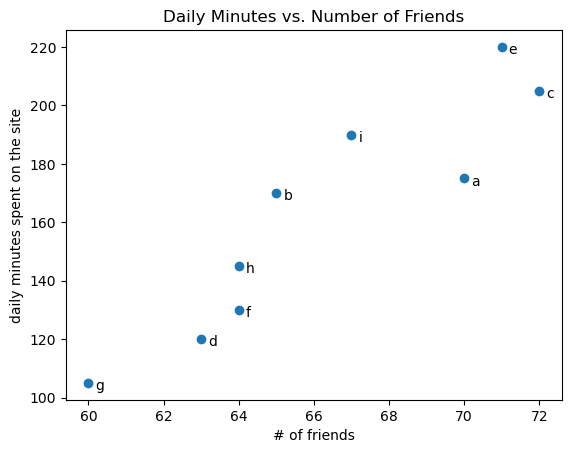

In [67]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
                 xy=(friend_count, minute_count), # put the label with its point
                 xytext=(5, -5), # but slightly offset
                 textcoords='offset points')
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

# 4 __Linear Algebra__

## 4.1 Vectors

Abstractly, vectors are objects that can be added together (to form new vectors) and
that can be multiplied by scalars (i.e., numbers), also to form new vectors.

The simplest from-scratch approach is to represent vectors as lists of numbers. A list
of three numbers corresponds to a vector in three-dimensional space, and vice versa

In [19]:
from typing import List

Vector = List[float]

height_weight_age = [175, # centimeter
                     68,  # kilograms
                     40]  # years
grades = [95, # exam1
          80, # exam2
          75, # exam3
          62 ] # exam4

we will want to perform arithmetic on vec‐
tors. Because Python lists aren’t vectors (and hence provide no facilities for vector
arithmetic), we’ll need to build these arithmetic tools ourselves. So let’s start with that.

For example, adding the vectors [1, 2] and [2, 1] results in [1 + 2, 2 + 1] or [3,
3]

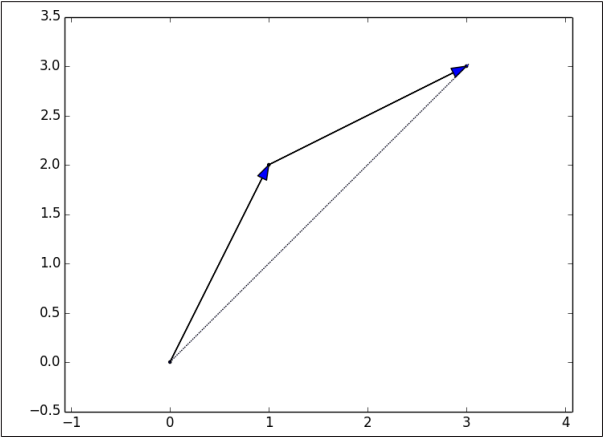

In [23]:
def add(v: Vector, w: Vector) -> Vector:
    """ Function for sum of 2 vectors """
    assert len(v) == len(w), 'Vectors must be the same length'
    return [v_i + w_i for v_i, w_i in zip(v, w)]

assert add([1,2,3], [4,5,6]) == [5,7,9]

In [25]:
def substract(v: Vector, w: Vector) -> Vector:
    """ Function for substraction of 2 vectors """
    assert len(v) == len(w), 'Vectors must be the same length'
    return [v_i - w_i for v_i, w_i in zip(v, w)]

assert substract([6,8,10], [4,5,6]) == [2,3,4]

another situation: we need __componentwise sum__ a list of vectors. new vector whose first element is the sum of all the first elements, whose second ele
ment is the sum of all the second elements, and so on

In [28]:
def vector_sum(vectors: List[Vector]) -> Vector:
    """ Function for componentwise sum of 2 vectors """
    assert vectors, 'no vectors included' # check if provided variables are vectors

    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), 'Vectors must be the same length'

    return [sum(vector[i] for vector in vectors) for i in range(num_elements)]

assert vector_sum(([1,2], [3,4], [5,6], [7,8])) == [16,20]

Multiplying a vector by a __scalar__:

In [31]:
def scalar_multiply(c: float, v: Vector) -> Vector:
    """ Multiplying each element in vector v by a number c """
    return [c * v_i for v_i in v]

assert scalar_multiply(3, [1,2,3]) == [3,6,9]

__Componentwise means__ of a list of (same-sized) vectors:

In [34]:
def vector_mean(vectors: List[Vector]) -> Vector:
    """ element-wise arithmetic mean """
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

assert vector_mean(([1,2], [3,4], [5,6])) == [3,4]

A less obvious tool is the __dot product__

In [37]:
def dot(v: Vector, w: Vector) -> Vector:
    """ "v_1 * w_1 + ... + v_n * w_n for 2 vectors """
    assert len(v) == len(w), 'Vectors must be the same length'
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

assert dot([1,2,3], [4,5,6]) == 32     # 1 * 4 + 2 * 5 + 3 * 6 = 4 + 10 + 18 = 32

vector’s __sum of squares__:

In [40]:
def sum_of_squares(v: Vector) -> float:
    """ "v_1 * v_1 + ... + v_n * v_n for 1 vector """
    return dot(v, v)

assert sum_of_squares([1,2,3]) == 14

__Magnitude__ (or length) of vector

In [43]:
import math

def magnitude(v: Vector) -> float:
    """ returns Magnitude (or lenght) of a vector v """
    return math.sqrt(sum_of_squares(v))

assert magnitude([3,4]) == 5

__Euclidean distance__ between 2 vectors
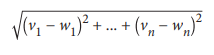

In [46]:
def distance(v: Vector, w: Vector) -> float:
    return magnitude(substract(v, w))

## 4.2 Matrices

A __matrix__ is a two-dimensional collection of numbers.  
If A is a matrix, then A[i][j] is the element in the ith row and the jth column.

In [50]:
Matrix = List[List[float]]

A = [[1, 2, 3],
     [4, 5, 6]]

B = [[1, 2],
     [3, 4],
     [5, 6]]

In [52]:
from typing import Tuple

def shape(A: Matrix) -> Tuple[int, int]:
    """ Returns (number or Rows A, number of columns A) """
    num_rows = len(A)                 # the matrix A has len(A) rows
    # Number of elements in first row
    num_cols = len(a[0]) if A else 0  # the matrix A has len(A[0]) columns    
    return num_rows, num_cols

If a matrix has n rows and k columns, we will refer to it as a n×k matrix. We can
(and sometimes will) think of each row of a n×k matrix as a vector of length k, and
each column as a vector of length n:

In [55]:
def get_row(A: Matrix, i: int) -> Vector:
    """ Returns i-th row of matrix A (as Vector type(from 4.1)) """
    return A[i]

def get_column(A: Matrix, j: int) -> Vector:
    """ Returns j-th row of matrix A (as Vector type(from 4.1)) """
    return [A_i[j]          # Returns j-th element of row A_i
            for a_i in A]   # for each row A_i

We’ll also want to be able to create a matrix given its shape and a function for generat‐
ing its elements. We can do this using a nested list comprehension:

In [58]:
from typing import Callable

def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int,int], float]) -> Matrix:
    """ Returns matrix with number of rows num_rows, number of columns num_cols,
    and [i, j]-th element of Matrix is a function entry_fn(i, j) """
    return [[entry_fn(i, j)                  # given i, create a list
                for j in range(num_cols)]    # [entry_fn(i, 0), ...
                for i in range(num_rows)]    # create one list for each i

Given this function, you could make a 5 × 5 identity matrix (with 1s on the diagonal and 0s elsewhere) with:

In [61]:
def identity_matrix(n: int) -> Matrix:
    """ Returns (n*n)-Identity matrix """
    return make_matrix(n, n, lambda i, j: 1 if i == j else 0)
    
identity_matrix(5)

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [63]:
friendships = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # user 0
               [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # user 1
               [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], # user 2
               [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # user 3
               [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # user 4
               [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], # user 5
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 6
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 7
               [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], # user 8
               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] # user 9

assert friendships[0][2] == 1, 'True, 0 and 2 are friends'
assert friendships[0][8] == 0, 'False, 0 and 8 are not friends'

friends_of_five = [i
                   for i, is_friend in enumerate(friendships[5])
                                                 if is_friend]

# 5 __Statistics__

## 5.1 Describing a Single Set of Data

As a first approach you put the friend counts into a histogram using Counter and plt.bar

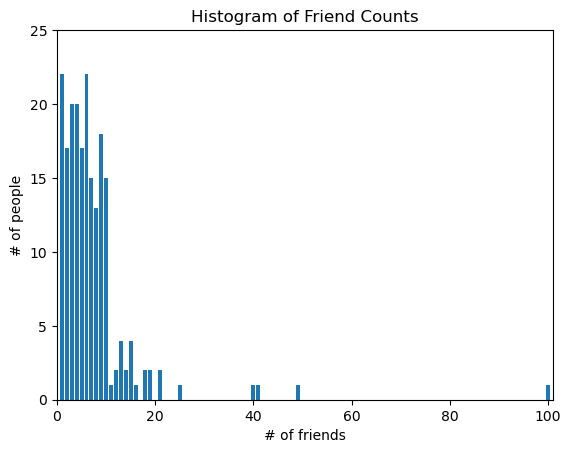

In [134]:
from collections import Counter
import matplotlib.pyplot as plt
import random

# num_friends = [random.randint(1, 100) for _ in range(204)]  # Generate 204 random integers between 1 and 100
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

friend_counts = Counter(num_friends)
xs = range(101)                        # Maximum value is 100
ys = [friend_counts[x] for x in xs]    # Height is the number of friends

plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [69]:
num_points = len(num_friends)     # number of points is 204
largest_value = max(num_friends)  # largest number of friends is 99
smallest_value = min(num_friends) # Smallest number of friends is 1

In [72]:
sorted_values = sorted(num_friends)      # Sorted values saved as another list
smallest_value = sorted_values[0]        # Minimum is 1
second_smallest_value = sorted_values[1] # Second minimun is 2
second_largest_value = sorted_values[-2] # Second maximum is 99

### 5.1.1 Central Tendencies

In [75]:
def mean(x):
 return sum(x) / len(x)
    
mean(num_friends) # 51.81372549019608

48.02450980392157

We’ll also sometimes be interested in the __median__, which is the middle-most value  
(if the number of data points is odd) or the average of the two middle-most values (if the number of data points is even).  
For instance, if we have five data points in a sorted vector x, the median is x[5 // 2] or x[2].  
If we have six data points, we want the average of x[2] (the third point) and x[3] (the fourth point).

In [78]:
""" _ underscore in the beggining of the function means that fundtion is private
they are callable form another function """

def _median_odd(xs: List[float]) -> float:
    """ if len(xs) is odd them median is in the centre of the list  """
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    """ if len(xs) is odd them median is between 2 central elements """
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2  # divide by and take only integer part (lower middle element)
    return (sorted_xs[hi_midpoint-1] + sorted_xs[hi_midpoint])/2   # sorted_xs[0] os the 1 element so we need
                                                                   # to reduce [i] by 1 in both mid points

def median(v: List[float]) -> float:
    """ returns median """
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median ([1, 10, 2, 9, 5]) == 5
assert median ([1, 9, 2, 19]) == (2+9)/2

In [80]:
median(num_friends)

47.5

Clearly, the mean is simpler to compute, and it varies smoothly as our data changes.  
If we have n data points and one of them increases by some small amount e,  
then necessarily the mean will increase by e / n

A generalization of the median is the quantile,  
which represents the value less than which a certain percentile of the data lies.  
(The median represents the value less than which 50% of the data lies.)

In [84]:
def quantile(x: List[float], p: float) -> float:
    """ Returns value of p-percentile in x """
    p_index = int(p * len(x))   # converts % into list index
    return sorted(x)[p_index]

quantile(num_friends, 0.10) # 10
quantile(num_friends, 0.25) # 27
quantile(num_friends, 0.75) # 77
quantile(num_friends, 0.90) # 92

88

Less commonly you might want to look at the __mode__, or most-common value[s]:

In [87]:
def mode(x: List[float]) -> List[float]:
    """ Returns list because there can be more than 1 mode """
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

mode(num_friends)

[4]

### 5.1.2 Dispersion

Dispersion refers to measures of how spread out our data is. Typically they’re statistics for which  
values near zero signify not spread out at all and for which large values (whatever that means) signify very spread out.  
For instance, a very simple measure is the __range__, which is just the difference between the largest and smallest elements:

In [91]:
def data_range(x: List[float]) -> float:
    return max(x) - min(x)

data_range(num_friends)

99

__Variance__ (__Dispersion__)

In [146]:
# from scratch.linear_algebra import sum_of_squares

def de_mean(xs: List[float]) -> List[float]:
    """ translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """ almost standard deviation from the average """
    assert len(xs) >= 2, "x has to have at least 2 elements to calculate Dispersion"
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

variance(num_friends)

81.54351395730716

In [148]:
def standard_deviation(x: List[float]) -> float:
    """ Standards Deviation is a square root of Variance """
    return math.sqrt(variance(x))

standard_deviation(num_friends)

9.03014473623248

__Mean__: The average of all the values in the list.  
__Deviations__: Differences between each value and the mean.  
__Squared Deviations__: Each deviation squared.  
__Variance__: The average of these squared deviations, which gives a measure of the spread of the data.  
__Standard Deviation__: The square root of the variance, providing a measure of dispersion in the same units as the original data.

__Interquantile Range (IQR)__ is difference between 75-% and 25-% percentiles

In [152]:
def interquartile_range(x):
    """ difference between 75-% and 25-% percentiles """
    return quantile(x, 0.75) - quantile(x, 0.25)
    
interquartile_range(num_friends)

6

## 5.2 Correlation

__Covariance__ (COrrelated VARIANCE) measures how two variables vary in tandem from their means  
(while _Variance_ measures how a single variable deviates from its mean)

In [156]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,
                 47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,
                 39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,
                 24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,
                 36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,
                 37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,
                 24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,
                 16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,
                 20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,
                 22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,
                 36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,
                 19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,
                 20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,
                 17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [158]:
def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must be the same size"
    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

covariance(num_friends, daily_minutes)

22.425435139573064

It’s more common to look at the __Correlation__, which divides out the standard deviations of both variables:

In [161]:
def correlation(xs: List[float], ys: List[float]) -> float:
    """ calculates the degree to which x and y vary """
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero

correlation(num_friends, daily_minutes)

0.24736957366478218

but there is an __Outlier__ in our data - The person with 100 friends  
(who spends only one minute per day on the site) is ahuge outlier,  
and correlation can be very sensitive to outliers. What happens if we ignore him?
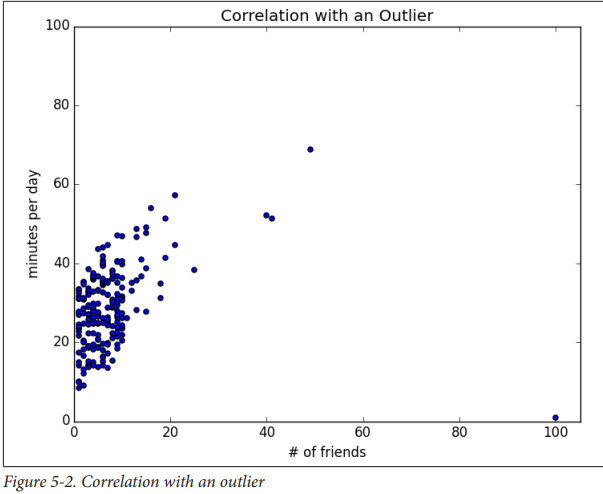

In [166]:
outlier = num_friends.index(100)

num_friends_good = [x for i, x in enumerate(num_friends) if i != outlier]
daily_minutes_good = [x for i, x in enumerate(daily_minutes) if i != outlier]

correlation(num_friends_good, daily_minutes_good)

0.5736792115665573

## 5.3 Simpson’s Paradox

The Simpson's Paradox is a statistical phenomenon where a trend appears in different groups of data but disappears or reverses when these groups are combined. This paradox highlights the importance of considering the effects of lurking variables, which are variables not included in the analysis but can affect the interpretation of the results.

For instance, Simpson's Paradox can occur when the groups being compared have different distributions of a lurking variable that influences the relationship between the variables under study.

for example  
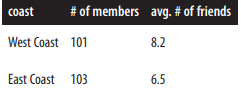  
It certainly looks like the West Coast data scientists are friendlier than the East Coast 
data scientists. Your coworkers advance all sorts of theories as to why this might be 
maybe it’s the sun, or the coffee, or the organic produce, or the laid-back Pacific vib

When playing with the data you discover something very strange. If you only look at 
people with PhDs, the East Coast data scientists have more friends on average. And i 
you only look at people without PhDs, the East Coast data scientists also have mo e
friends on avera  
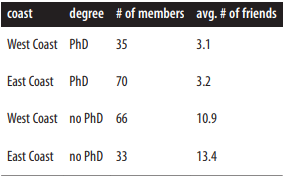  

The only real way to avoid this is by knowing your data and by doing what you can to
make sure you’ve checked for possible confounding factors. ge!e?

## 5.4 Some Other Correlational Caveats

A correlation of zero indicates that there is no linear relationship between the two variables. However, there may be other sorts of relationships. For example, if:  
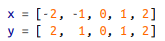  
then x and y have zero correlation. But they certainly have a relationship—each ele
ment of y equals the absolute value of the corresponding element of x  

In addition, correlation tells you nothing about how large the relationship is. Th 
variable  
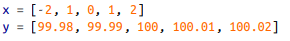  
are perfectly correlated, but (depending on what you’re measuring) it’s quite possible 
that this relationship isn’t all that interesting.]  0.

## 5.5 Correlation and Causation

if x and y are strongly correlated, that might mean that x causes y, that y causes x, that each causes the other, that some third factor causes both, or it might mean nothing.  


One way to feel more confident about causality is by conducting randomized trials. If 
you can randomly split your users into two groups with similar demographics an 
give one of the groups a slightly different experience, then you can often feel pret y
good that the different experiences are causing the different outcomes.

# 6 Probability

For our purposes you should think of __probability__ as a way of quantifying the uncertainty associated with events chosen from a some universe of events.  

Notationally, we write P(E) to mean “the probability of the event E.”

## 6.1 Dependence and Independence

Roughly speaking, we say that two events E and F are dependent if knowing something about whether E happens gives us information about whether F happens (and vice versa). Otherwise they are independent.


Mathematically, we say that two events E and F are independent if the probability that they both happen is the product of the probabilities that each one happens:  
P(E,F) = P(E) * P(F)

## 6.2 Conditional Probability

When two events E and F are independent, then by definition we have:  
P(E, F) = P(E) * P(F)

If they are not necessarily independent (and if the probability of F is not zero), then we define the __Conditional Probability__ of E “conditional on F” as:  
P(E|F) = P(E, F) / P(F)  
(probability that E happens, given that we know that F 
happen)F.

We often rewrite this as:  
P(E, F) = P(E|F) * P(F)

When E and F are independent, you can check that this gives:  
P(E|F) = P(E)  
(knowing F occurred gives us no 
additional information about whether E occurre).

In [51]:
import enum, random

class Kid(enum.Enum):
    BOY = 0
    GIRL = 1

def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10_000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1

print("P(both | older):", both_girls / older_girl)
print("P(both | either): ", both_girls / either_girl)

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


## 6.3 Bayes’s Theorem

__Bayes’s Theorem__ is a way of “reversing” conditional probabilities

Let’s say we need to know the probability of some event E conditional on some other event F occurring.  
But we only have information about the probability of F conditional on E occurring.  

Using the definition of conditional 
probability twice tells us that  
P(E|F) = P(E, F)/P(F) = P(F|E) * P(E)/P(F)  

The event F can be split into the two mutually exclusive events “F and E” and “F and 
not E.” If we write ¬E for “not E” (i.e., “E doesn’t happen”), then  
P(F) = P(F, E) + P(F, ¬E)


so that Bayes’s Theorem:  

__P(E|F) = P(F|E) * P(E) / P(F|E) * P(E) + P(F, ¬E) * P (¬E)__

Imagine a certain disease that affects 1 in every 10,000 people. And imagine
that there is a test for this disease that gives the correct result (“diseased” if you have
the disease, “nondiseased” if you don’t) 99% of the time.  

What does a positive test mean? Let’s use T for the event “your test is positive” and D
for the event “you have the disease.” Then Bayes’s Theorem says that the probability
that you have the disease, conditional on testing positive, is:  

P(D|T) = P(T|D) * P(D) / P(T|D) * P(D) + P(T, ¬D) * P(¬D)

P(T|D) = 0.99 (the probability that someone with the disease tests posi
tiv)  
P(D) = 1/10_000 = 0.0001 (the probability that any given person has the disease)  
P(T, ¬D) = 0.1 (the probability that someone without the disease tests positive)  
P(¬D) = 0.9999 (the probability that any given person doesn’t have the disease)


P(D|T) = 0.98  

That is, less than 1% of the people who test positive actually have the disease.

## 6.4 Random Variables

A __random variable__ is a variable whose possible values have an associated probability distribution.

## 6.5 Continuous Distributions

we represent a continuous distribution with a probability density function (pdf) such that the probability of seeing a value in a certain interval equals the integral of the density function over the interval

In [84]:
# The density function for the uniform distribution is just:

def uniform_pdf(x: float) -> float:
 return 1 if x >= 0 and x < 1 else 0

In [86]:
# We will often be more interested in the cumulative distribution function (cdf), which
# gives the probability that a random variable is less than or equal to a certain value.
# It’s not hard to create the cumulative distribution function for the uniform distribution

def uniform_cdf(x: float) -> float:
    """ "returns the probability that a uniform random variable is <= x """
    if x < 0: return 0     # uniform random is never less than 0
    elif x < 1: return x   # e.g. P(X <= 0.4) = 0.4
    else: return 1         #  uniform random is always less than 1

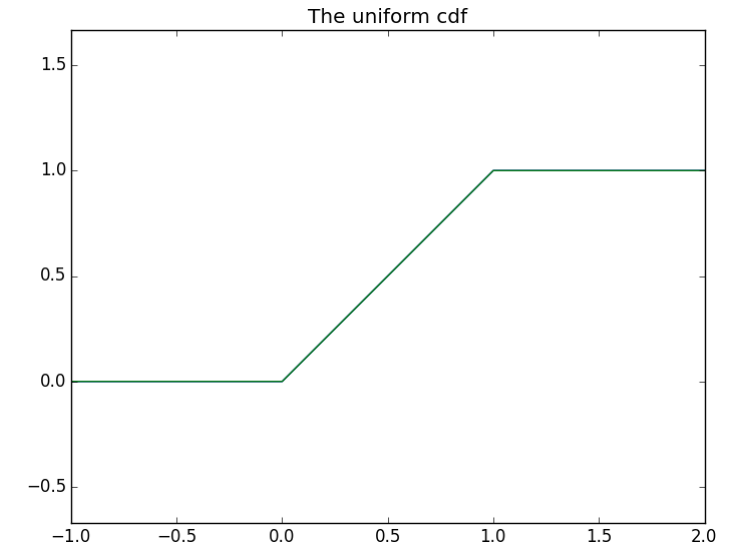

## 6.7 The Normal Distribution

It is the classic bell curve–shaped distribution and is completely determined by two parameters: its mean μ (mu) and its standard deviation σ (sigma). The mean indicates where the bell is centered, and the standard deviation how “wide” it is.  

it has the distribution function:  
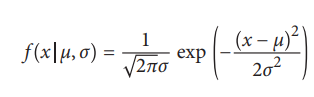  

which we can implement as:

In [94]:
import math
SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

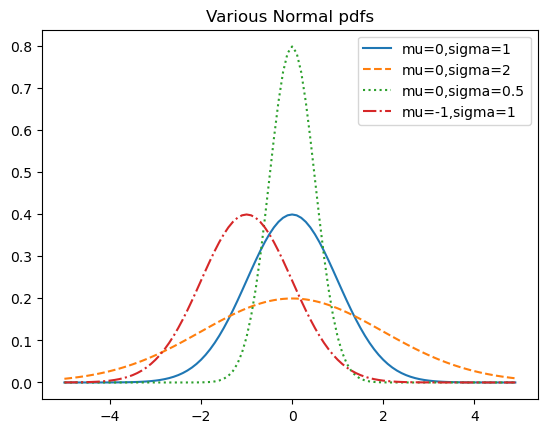

In [96]:
import matplotlib.pyplot as plt

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

When μ= 0 and σ= 1, it’s called the __standard normal distribution__. If Z is a standard normal random variable, then it turns out that:  
X = σ * Z + μ  
is also normal but with mean μ and standard deviation σ. Conversely, if X is a normal random variable with mean μ and standard deviation σ,  
Z = X − μ / σ  
is a standard normal variable.

The cumulative distribution function (CDF) for the normal distribution cannot be written in an “elementary” manner, but we can write it using Python’s math.erf:

In [103]:
def normal_cdf(x: float, mu: float = 0,sigma: float = 1) -> float:
 return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

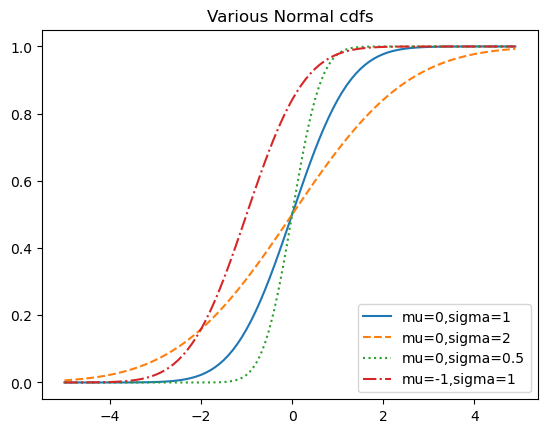

In [105]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

Sometimes we’ll need to invert normal_cdf to find the value corresponding to a specified probability. There’s no simple way to compute its inverse, but normal_cdf is continuous and strictly increasing, so we can use a binary search:

In [120]:
def inverse_normal_cdf(p: float,
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float: # set precision
    """find approximate inverse using binary search"""
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
        
        low_z, low_p = -10.0, 0 # normal_cdf(-10) is (very close to) 0
        hi_z, hi_p = 10.0, 1 # normal_cdf(10) is (very close to) 1
        
        while hi_z - low_z > tolerance:
            mid_z = (low_z + hi_z) / 2 # consider the midpoint
            mid_p = normal_cdf(mid_z) # and the cdf's value there
            if mid_p < p:
                # midpoint is still too low, search above it
                low_z, low_p = mid_z, mid_p
            elif mid_p > p:
                # midpoint is still too high, search below it
                hi_z, hi_p = mid_z, mid_p
            else:
                break
        return mid_z

## 6.8 The Central Limit Theorem

A random variable defined as the average of a large number of independent and identically distributed random variables is itself approximately normally distributed.

In particular, if x1
, ..., x 
 are random variables with mean μ and standard deviation  ,
and if n is large, th  
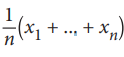  
is approximately normally distributed with mean μ and standard deviation σ/n. 
Equivalently (but often more usefully)  
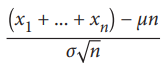  
is approximately normally distributed with mean 0 and standard deviation 1.,en:

An easy way to illustrate this is by looking at __binomial random variables__, which have 
two parameters n and p  
 A Binomial(n,p) random variable is simply the sum of  fo
independent Bernoulli(p) random variables, each of which equals 1 with probabili y p
and 0 with probability 1 −p:

In [137]:
def bernoulli_trial(p: float) -> float:
    return 1 if random.random() < p else 0

def binominal(n: int, p: float) -> int:
    return sum(bernoulli_trial(p) for _ in range(n))

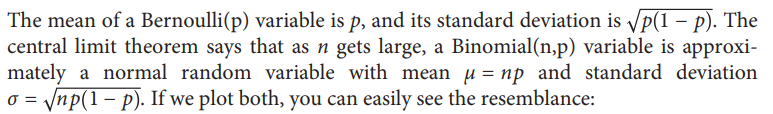

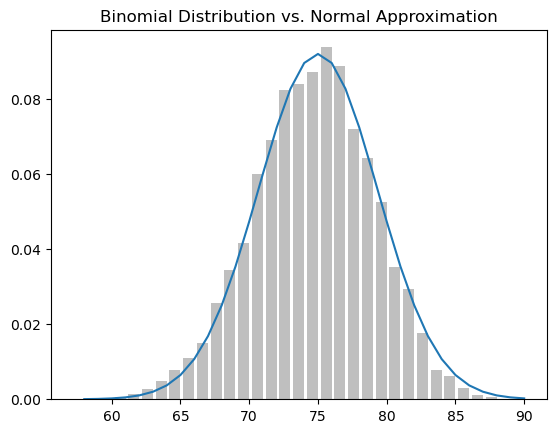

In [140]:
from collections import Counter

def binominal_histogram(p: float, n: int, num_points: int) -> None:
    """ get points from binominal(n, p) and plot the hostogramm """
    data = [binominal(n, p) for _ in range(num_points)]

    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

binominal_histogram(0.75, 100, 10_000)

The moral of this approximation is that if you want to know the probability that (say)
a fair coin turns up more than 60 heads in 100 flips, you can estimate it as the proba‐
bility that a Normal(50,5) is greater than 60, which is easier than computing the Bino‐
mial(100,0.5) cdf. (Although in most applications you’d probably be using statistical
software that would gladly compute whatever probabilities you want.)

# 7 Hypothesis and Inference

## 7.1 Statistical Hypothesis Testing

In the classical setup, we have a null hypothesis H0 that represents some default posi
tion, and some alternative hypothesis H1that we’d like to compare it with. We use st
tistics to decide whether we can reject H0 as false or not. This will probably ma e
more sense with an example.

## 7.2 Example: Flipping a Coin

In particular, our test will involve flipping the coin some number n times and counting the number of heads X. Each coin flip is a Bernoulli trial, which means that X is a Binomial(n,p) random variable, which (as we saw in Chapter 6) we can approximate using the normal distribution:

In [222]:
from typing import Tuple
import math

def normal_approximation_to_binomial(n: int, p: float) -> Tuple[float, float]:
    """finds mu and sigma corresponding to a Binomial(n, p)
    n - number of tests, p - probability of success test"""
    mu = p * n # mu is Mean
    sigma = math.sqrt(p * (1 - p) * n)
    return mu, sigma # sigma is a Standard Deviation

normal_approximation_to_binomial(400, 0.3)

(120.0, 9.16515138991168)

Whenever a random variable follows a normal distribution, we can use normal_cdf 
to figure out the probability that its realized value lies within (or outside) a particula 
interval:

In [231]:
""" def normal_cdf(x, mu = 0, sigma = 1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

# the normal cdf _is_ the probability the variable is below a threshold
normal_probability_below = normal_cdf

def inverse_normal_cdf(p, mu = 0, sigma = 1, tolerance = 0.00001):
    Find approximate inverse using binary search

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z = -10.0                      # normal_cdf(-10) is (very close to) 0
    hi_z  =  10.0                      # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # Consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            low_z = mid_z              # Midpoint too low, search above it
        else:
            hi_z = mid_z               # Midpoint too high, search below it

    return mid_z """

" def normal_cdf(x, mu = 0, sigma = 1):\n    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2\n\n# the normal cdf _is_ the probability the variable is below a threshold\nnormal_probability_below = normal_cdf\n\ndef inverse_normal_cdf(p, mu = 0, sigma = 1, tolerance = 0.00001):\n    Find approximate inverse using binary search\n\n    # if not standard, compute standard and rescale\n    if mu != 0 or sigma != 1:\n        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)\n\n    low_z = -10.0                      # normal_cdf(-10) is (very close to) 0\n    hi_z  =  10.0                      # normal_cdf(10)  is (very close to) 1\n    while hi_z - low_z > tolerance:\n        mid_z = (low_z + hi_z) / 2     # Consider the midpoint\n        mid_p = normal_cdf(mid_z)      # and the cdf's value there\n        if mid_p < p:\n            low_z = mid_z              # Midpoint too low, search above it\n        else:\n            hi_z = mid_z               # Midpoint too high, 

In [239]:
import math
from typing import Callable

def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    """ normal CDF is probability hat a value from a normal distribution is less than or equal to a specific number """
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

# the normal cdf _is_ the probability the variable is below a threshold
normal_probability_below: Callable[[float, float, float], float] = normal_cdf

def inverse_normal_cdf(p: float, mu: float = 0, sigma: float = 1, tolerance: float = 0.00001) -> float:
    """Find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z = -10.0                      # normal_cdf(-10) is (very close to) 0
    hi_z  =  10.0                      # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # Consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            low_z = mid_z              # Midpoint too low, search above it
        else:
            hi_z = mid_z               # Midpoint too high, search below it

    return mid_z

In [233]:
def normal_probability_above(lo: float, mu: float = 0, sigma: float = 1) -> float:
    """It's above the threshold if it's not below the threshold"""
    return 1 - normal_cdf(lo, mu, sigma)

def normal_probability_between(lo: float, hi: float, mu: float = 0, sigma: float = 1) -> float:
    """It's between if it's less than hi, but not less than lo"""
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

def normal_probability_outside(lo: float, hi: float, mu: float = 0, sigma: float = 1) -> float:
    """It's outside if it's not between"""
    return 1 - normal_probability_between(lo, hi, mu, sigma)

In [235]:
def normal_upper_bound(probability: float, mu: float = 0, sigma: float = 1) -> float:
    """returns the z for which P(Z <= z) = probability"""
    return inverse_normal_cdf(probability, mu, sigma)

def normal_lower_bound(probability: float, mu: float = 0, sigma: float = 1) -> float:
    """returns the z for which P(Z >= z) = probability"""
    return inverse_normal_cdf(1 - probability, mu, sigma)

def normal_two_sided_bounds(probability: float, mu: float = 0, sigma: float = 1) -> Tuple[float, float]:
    """returns the symmetric (about the mean) bounds
    that contain the specified probability"""
    tail_probability = (1 - probability) / 2
    # upper bound should have tail_probability above it
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)
    # lower bound should have tail_probability below it
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)
    return lower_bound, upper_bound

In particular, let’s say that we choose to flip the coin n = 1000 times. If our hypothesis of fairness is true, X should be distributed approximately normally with mean 50 and standard deviation 15.8

In [245]:
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)

We need to make a decision about significance—how willing we are to make a type 1 
error (“false positive”), in which we reject H0even though it’s true. For reasons lost t 
the annals of history, this willingness is often set at 5% or 1%. Let’s choose 5%.

In [243]:
normal_two_sided_bounds(0.95, mu_0, sigma_0)

(469.01026640487555, 530.9897335951244)

Assuming p really equals 0.5 (i.e., H0is true), there is just a 5% chance we observe an
X that lies outside this interval, which is the exact significance we wanted. Said diffe
ently, if H0 is true, then, approximately 19 times out of 20, this test will give the r‐
rect reslt.

We are also often interested in the power of a test, which is the probability of not 
making a type 2 error, in which we fail to reject H0 even though it’s false. In order t 
measure this, we have to specify what exactly H0being false means. (Knowing mere y
that p is not 0.5 doesn’t give you a ton of information about the distribution of   
.) In
particular, let’s check what happens if p is really 0.55, so that the coin is slig tly bi sed
toward h  eads.
In that case, we can calculate the power of the test with:

In [202]:
# 95% bounds based on assumption p is 0.5
lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)
# actual mu and sigma based on p = 0.55
mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)
# a type 2 error means we fail to reject the null hypothesis
# which will happen when X is still in our original interval
type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
power = 1 - type_2_probability # 0.887

Imagine instead that our null hypothesis was that the coin is not biased toward heads,
or that p ≤ 0 . 5. In that case we want a one-sided test that rejects the null hypothesis
when X is much larger than 50 but not when X is smaller than 50. So a -nfo
significance test involves using normal_probability_below to find the cutoff  elow
which 95% of the probability lies:

In [253]:
hi = normal_upper_bound(0.95, mu_0, sigma_0)
# is 526 (< 531, since we need more probability in the upper tail)
type_2_probability = normal_probability_below(hi, mu_1, sigma_1)
power = 1 - type_2_probability

This is a more powerful test, since it no longer rejects H0 when X is below 469 (which
is very unlikely to happen if H1is true) and instead rejects H0 when X is between 526
and 531 (which is somewhat likely to happen if H1 is true).

## 7.3 P-values

An alternative way of thinking about the preceding test involves p-values. Instead of choosing bounds based on some probability cutoff, we compute the probability - assuming H0 is true—that we would see a value at least as extreme as the one we actually observed

In [258]:
#For our two-sided test of whether the coin is fair, we compute:
def two_sided_p_value(x, mu=0, sigma=1):
    if x >= mu:
        # if x is greater than the mean, the tail is what's greater than x
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        # if x is less than the mean, the tail is what's less than x
        return 2 * normal_probability_below(x, mu, sigma)

two_sided_p_value(529.5, mu_0, sigma_0) 

0.06207721579598835

In [260]:
import random

extreme_value_count = 0
for _ in range(100_000):
    num_heads = sum(1 if random.random() < 0.5 else 0    # count # of heads
                    for _ in range(1000))                # in 1000 flips
    if num_heads >= 530 or num_heads <= 470:             # and count how often
        extreme_value_count += 1                         # the # is 'extreme'

extreme_value_count/100_000

0.0613

Since the p-value is greater than our 5% significance, we don’t reject the null. If we instead saw 532 heads, the p-value would be:

In [263]:
two_sided_p_value(531.5, mu_0, sigma_0)

0.046345287837786575

which is smaller than the 5% significance, which means we would reject the null. It’s
the exact same test as before. It’s just a different way of approaching the statistics.
Similarly, we would have:

In [266]:
upper_p_value = normal_probability_above
lower_p_value = normal_probability_below

For our one-sided test, if we saw 525 heads we would compute:

In [269]:
upper_p_value(524.5, mu_0, sigma_0)

0.06062885772582072

which means we wouldn’t reject the null. If we saw 527 heads, the computation would
be:

In [272]:
upper_p_value(526.5, mu_0, sigma_0) # 0.047

0.04686839508859242

and we would reject the null.

## 7.4 Confidence intervals

For example, we can estimate the probability of the unfair coin by looking at the aver
age value of the Bernoulli variables corresponding to each flip—1 if heads, 0 if tails. I 
we observe 525 heads out of 1,000 flips, then we estimate p equals 0.52 nfo
How confident can we be about this estimate?

In [281]:
p_hat = 525/1000
mu = p_hat
math.sqrt(p * (1 - p) / 1000)

0.015811388300841896

This is not entirely justified, but people seem to do it anyway. Using the normal 
approximation, we conclude that we are “95% confident” that the following interva 
contains the true parameter p:

In [286]:
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000)
normal_two_sided_bounds(0.95, mu, sigma)

(0.4940490278129096, 0.5559509721870904)

## 7.5 P-Hacking

A procedure that erroneously rejects the null hypothesis only 5% of the time will—by 
definition—5% of the time erroneously reject the null hypothesis:

In [290]:
from typing import List

def run_experiment() -> List[bool]:
    """ flip a fair coin 1000 times, True = heads, False = tails """
    return [random.random() < 0.5 for _ in range(1000)]

In [292]:
def reject_fairness(experiment: List[bool]) -> bool:
    """using the 5% significance levels"""
    num_heads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heads > 531

In [296]:
random.seed(0)
experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment 
                      for experiment in experiments 
                      if reject_fairness(experiment)])
print(num_rejections)

46


What this means is that if you’re setting out to find “significant” results, you usually can. Test enough hypotheses against your data set, and one of them will almost certainly appear significant. Remove the right outliers, and you can probably get your p-value below 0.05. (We did something vaguely similar in “Correlation” on page 62; did you notice?)  

This is sometimes called P-hacking and is in some ways a consequence of the “inference from p-values framework.” A good article criticizing this approach is “The Earth Is Round.”  

If you want to do good science, you should determine your hypotheses before looking at the data, you should clean your data without the hypotheses in mind, and you should keep in mind that p-values are not substitutes for common sense. (An alternative approach is “Bayesian Inference” on page 88.)

## 7.5 Example: Running an A/B Test

One of 
your advertisers has developed a new energy drink targeted at data scientists, and th 
VP of Advertisements wants your help choosing between advertisement A (“tast s
great!”) and advertisement B (“less bias!”).

If 990 out of 1,000 A-viewers click their ad while only 10 out of 1,000 B-viewers click 
their ad, you can be pretty confident that A is the better ad. But what if the difference 
are not so stark? Here’s where you’d use statistical inference.

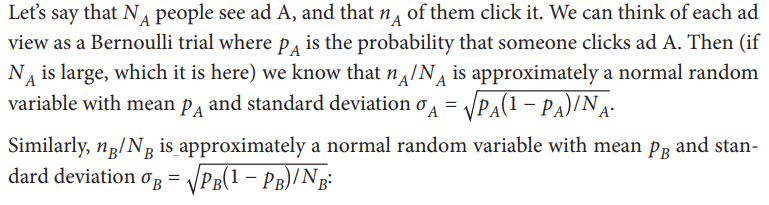

In [303]:
def estimated_parameters(N: int, n: int) -> Tuple[float, float]:
    p = n / N
    sigma = math.sqrt(p * (1 - p) / N)
    return p, sigma

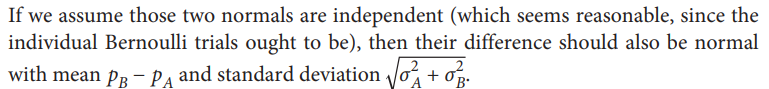  
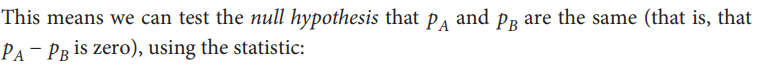

In [306]:
def a_b_test_statistic(N_A: int, n_A: int, N_B: int, n_B: int) -> float:
    p_A, sigma_A = estimated_parameters(N_A, n_A)
    p_B, sigma_B = estimated_parameters(N_B, n_B)
    return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2) # (p_B - p_A) is the difference in the conversion rates 
                                                                # (or success rates) between two groups: group B and group A.
                                                                # (sigma_A ** 2 + sigma_B ** 2) is a Standard Deviation

For example, if “tastes great” gets 200 clicks out of 1,000 views and “less bias” gets 180 
clicks out of 1,000 views, the statistic equals:

In [310]:
z = a_b_test_statistic(1000, 200, 1000, 180)
z

-1.1403464899034472

The probability of seeing such a large difference if the means were actually equal would be:

In [316]:
two_sided_p_value(z)

0.254141976542236

which is large enough that you can’t conclude there’s much of a difference. On the 
other hand, if “less bias” only got 150 clicks, we’d have:

In [319]:
z = a_b_test_statistic(1000, 200, 1000, 150)
two_sided_p_value(z)

0.003189699706216853

which means there’s only a 0.003 probability you’d see such a large difference if the ads were equally effective.

## 7.6 Bayesian Inference

The procedures we’ve looked at have involved making probability statements about 
our tests: “there’s only a 3% chance you’d observe such an extreme statistic if our nul 
hypothesis were true.”

An alternative approach to inference involves treating the unknown parameters 
themselves as random variables. The analyst (that’s you) starts with  a__ prior distrib
ti__on for the parameters and then uses the observed data an__d Bayes’s Theor__em to g t
__an updated posterior distribut__ion for the parameters. Rather than making probabil ty
judgments about the tests, you make probability judgments about the parame ers
themselves.

For example, when the unknown parameter is a probability (as in our coin-flipping 
example), we often use a prior from the Beta distribution, which puts all its probabi
ity between 0 and 1:

In [332]:
def B(alpha: float, beta: float) -> float:
    """a normalizing constant so that the total probability is 1"""
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)

def beta_pdf(x: float, alpha: float, beta: float) -> float:
    if x < 0 or x > 1: # no weight outside of [0, 1]
        return 0
    return x ** (alpha - 1) * (1 - x) ** (beta - 1) / B(alpha, beta)

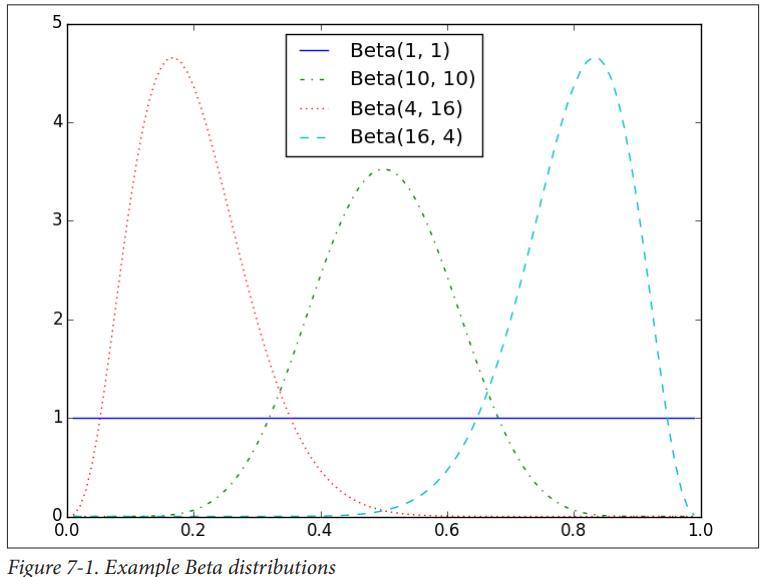

So let’s say we assume a prior distribution on p. Maybe we don’t want to take a stand 
on whether the coin is fair, and we choose alpha and beta to both equal 1. Or mayb 
we have a strong belief that it lands heads 55% of the time, and we choose alp a
equals 55, beta equals 4.

45.
Then we flip our coin a bunch of times and see h heads and t tails. Bayes’s The rem
(and some mathematics that’s too tedious for us to go through here) tells us tha  the
posterior distribution for p is again a Beta distribution but with parameters a pha +
h and beta + t.

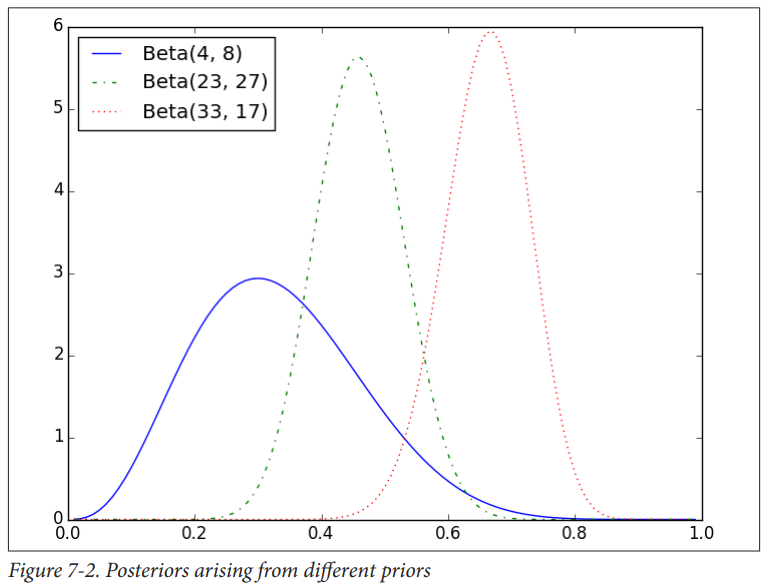

# 8 Gradient Descent

Method of selecting the best model from scratch, which either minimizes its prediction error or maximizes the likelihood of the data (i.e., a certain optimization problem is solved)

## 8.1 The Idea Behind Gradient Descent

In [344]:
from typing import List

Vector = List[float]

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))


def sum_of_squares(v: Vector) -> float:
    """ "computes the sum of squared elements in v """
    return dot(v, v)

In simple terms, the gradient in gradient descent represents the direction and rate of change of a function. It helps us find the minimum (or maximum) of a function by indicating the steepest direction of descent.  
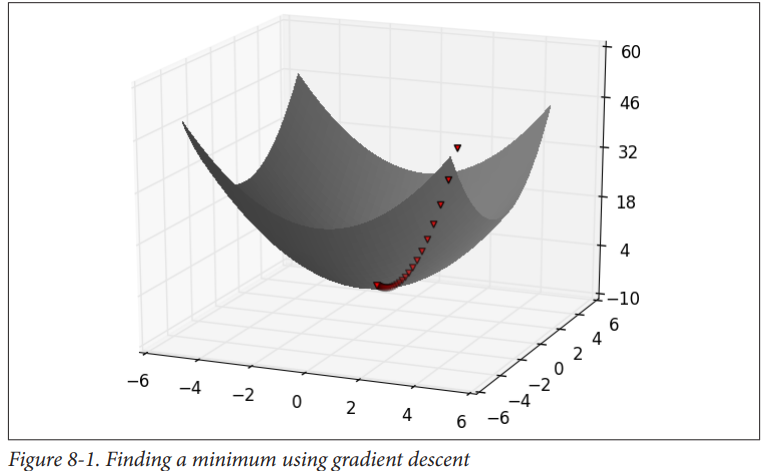

## 8.2 Estimating the Gradient

If f is a function of one variable, its derivative at a point x measures how f(x) 
changes when we make a very small change to x. It is defined as the limit of the di
ference quotients

In [350]:
from typing import Callable 

def difference_quotient(f: Callable,
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h  # as h approaches zero

The derivative is the slope of the tangent line at x, f x , while the difference quotient is the slope of the not-quite-tangent line that runs through x + h, f x + h . As h gets smaller and smaller, the not-quite-tangent line gets closer and closer to the tangent line  
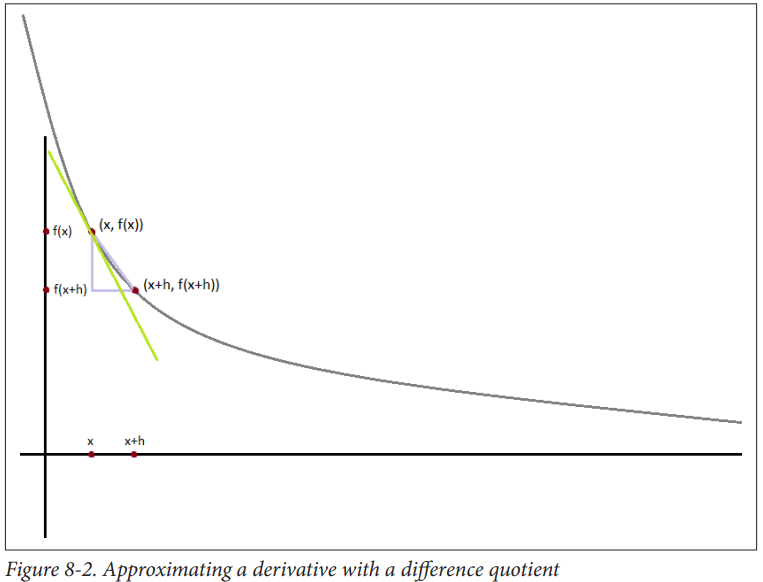-2)

In [358]:
# For many functions it’s easy to exactly calculate derivatives. For example, the square function:
def square(x: float) -> float:
    return x * x

# has the derivative
def derivative(x: float) -> float:
    return 2 * x

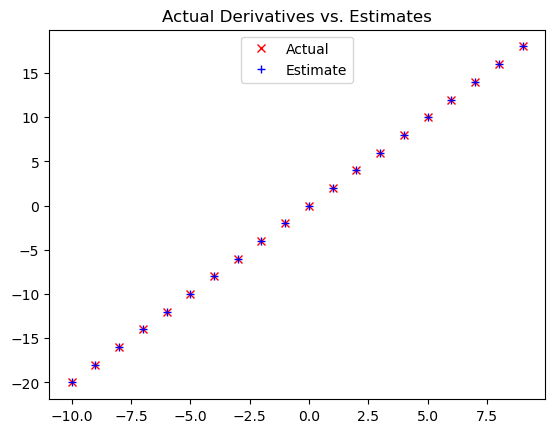

In [366]:
xs = range(-10,10)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h =0.001) for x in xs]
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual') # red x
plt.plot(xs, estimates, 'b+', label='Estimate') # blue +
plt.legend(loc=9)
plt.show()

When f is a function of many variables, it has multiple partial derivatives, each indi‐
cating how f changes when we make small changes in just one of the input variables  

We calculate its ith partial derivative by treating it as a function of just its ith variable,
holding the other variables fixed

In [372]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: float,
                                i: int,
                                h: float) -> float:
    """compute the ith partial difference quotient of f at v"""
    w = [v_j + (h if j == i else 0) # add h to just the ith element of v
         for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

In [374]:
# after which we can estimate the gradient the same way:
def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float =0.00001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]

## 8.3 Using the Gradient

Let’s use gradients to find the minimum among all three-dimensional vectors. We’ll just pick a random starting point and then take tiny steps in the opposite direction of the gradient until we reach a point where the gradient is very small:
l:

In [401]:
def subtract(v: Vector, w: Vector) -> Vector:
    """Subtracts corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"
    return [v_i - w_i for v_i, w_i in zip(v, w)]

def squared_distance(v: Vector, w: Vector) -> float:
    """Computes (v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(subtract(v, w))

def distance(v: Vector, w: Vector) -> float:
    """Computes the distance between v and w"""
    return math.sqrt(squared_distance(v, w))


def add(v: Vector, w: Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"
    return [v_i + w_i for v_i, w_i in zip(v, w)]

def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

In [403]:
import random

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """move step_size in the direction of gradient from v"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

In [409]:
# pick a random starting point
v = [random.randint(-10,10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v) # compute gradient in v
    v = gradient_step(v, grad, -0.01) # take a negative gradient step
    print(epoch, v)

0 [7.84, 9.8, -3.92]
1 [7.6832, 9.604000000000001, -3.8416]
2 [7.529536, 9.41192, -3.764768]
3 [7.37894528, 9.2236816, -3.68947264]
4 [7.2313663744, 9.039207968000001, -3.6156831872]
5 [7.086739046912, 8.858423808640001, -3.543369523456]
6 [6.94500426597376, 8.6812553324672, -3.47250213298688]
7 [6.806104180654285, 8.507630225817856, -3.4030520903271424]
8 [6.669982097041199, 8.337477621301499, -3.3349910485205996]
9 [6.536582455100375, 8.17072806887547, -3.2682912275501876]
10 [6.405850805998368, 8.00731350749796, -3.202925402999184]
11 [6.2777337898784005, 7.847167237348001, -3.1388668949392002]
12 [6.152179114080832, 7.690223892601041, -3.076089557040416]
13 [6.0291355317992155, 7.5364194147490196, -3.0145677658996077]
14 [5.908552821163231, 7.385691026454039, -2.9542764105816155]
15 [5.7903817647399665, 7.237977205924959, -2.8951908823699832]
16 [5.674574129445167, 7.0932176618064595, -2.8372870647225836]
17 [5.5610826468562635, 6.95135330857033, -2.7805413234281318]
18 [5.44986099

In [415]:
# pick a random starting point
v = [random.randint(-10,10) for i in range(3)]

tolerance = 0.0000001
epoch = 0  # Initialize the epoch counter

while True:
    grad = sum_of_squares_gradient(v)  # compute gradient in v
    next_v = gradient_step(v, grad, -0.01)  # take a negative gradient step
    print(epoch, v)
    if distance(next_v, v) < tolerance:  # stop if we're converging
        break
    v = next_v
    epoch += 1  # Increment the epoch counter

0 [-2, -4, -4]
1 [-1.96, -3.92, -3.92]
2 [-1.9208, -3.8416, -3.8416]
3 [-1.882384, -3.764768, -3.764768]
4 [-1.84473632, -3.68947264, -3.68947264]
5 [-1.8078415936, -3.6156831872, -3.6156831872]
6 [-1.771684761728, -3.543369523456, -3.543369523456]
7 [-1.73625106649344, -3.47250213298688, -3.47250213298688]
8 [-1.7015260451635712, -3.4030520903271424, -3.4030520903271424]
9 [-1.6674955242602998, -3.3349910485205996, -3.3349910485205996]
10 [-1.6341456137750938, -3.2682912275501876, -3.2682912275501876]
11 [-1.601462701499592, -3.202925402999184, -3.202925402999184]
12 [-1.5694334474696001, -3.1388668949392002, -3.1388668949392002]
13 [-1.538044778520208, -3.076089557040416, -3.076089557040416]
14 [-1.5072838829498039, -3.0145677658996077, -3.0145677658996077]
15 [-1.4771382052908077, -2.9542764105816155, -2.9542764105816155]
16 [-1.4475954411849916, -2.8951908823699832, -2.8951908823699832]
17 [-1.4186435323612918, -2.8372870647225836, -2.8372870647225836]
18 [-1.3902706617140659, -2.7

## 8.4 Choosing the Right Step Size

• Using a fixed step size  
• Gradually shrinking the step size over time  
• At each step, choosing the step size that minimizes the value of the objective functionnputs:nputs:s:ion

## 8.5 Using gradient descent to fit models

In [426]:
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

In [428]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    """ function that compute gradient based on error from 1 data value """
    slope, intercept = theta
    predicted = slope * x + intercept
    error = (predicted - y)
    squarred_error = error ** 2
    grad = [2 * error * x, 2 * error]
    return grad

1) pick random theta
2) compute average of different gradients
3) correct theta in that direction
4) repeat

In [435]:
def vector_sum(vectors: List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    # Check that vectors is not empty
    assert vectors, "no vectors provided!"

    # Check the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"

    # the i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]

def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

def vector_mean(vectors: List[Vector]) -> Vector:
    """Computes the element-wise average"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(500):
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta

0 [33.89392163184087, -0.8339372354459217]
1 [10.726920334326689, -0.808375439343189]
2 [26.179335761564754, -0.8060317681301757]
3 [15.872577015268174, -0.7882403688323506]
4 [22.747202890447298, -0.7807913110794177]
5 [18.161834880760573, -0.7664825255668115]
6 [21.220289652007132, -0.7567877256349173]
7 [19.180310014385608, -0.7440538605316402]
8 [20.540989166544268, -0.7333854427961913]
9 [19.633426840472175, -0.7213776827440547]
10 [20.238782919722315, -0.7103015005380944]
11 [19.835021491044678, -0.6986421146172959]
12 [20.104342023358583, -0.6874098088970165]
13 [19.924716460610927, -0.6759306472558639]
14 [20.044538190125255, -0.6646540695007412]
15 [19.964628373116955, -0.6532802231716145]
16 [20.01793959490782, -0.6420090343521543]
17 [19.98239228116213, -0.6307070766885422]
18 [20.006113641388172, -0.619463270254003]
19 [19.990302737923834, -0.608218230072107]
20 [20.00085985557473, -0.5970114908740389]
21 [19.99382946484078, -0.5858166080367161]
22 [19.998529930343164, -0.5

## 8.6 Mini-Batch and Stochastic Gradient Descent

previous solution is ok for small data sets

so we want to make gradient steps more often. We can do this by using Mini-Batch in which we compute gradient based on "mini-Batch" collected from larger data sets:

In [447]:
from typing import TypeVar, List, Iterator

T = TypeVar('T')

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """ Generate mini batches with size batch_size from data set """
    # start index from 0, batch_size, batch_size * 2, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts) # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

New solution with mini batches:

In [450]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x ,y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta

0 [16.076428813387928, -0.14328701554818762]
1 [19.520164897812045, -0.47693500889879437]
2 [20.162361590324142, -0.5363943012908996]
3 [20.164746798925144, -0.5012420321186428]
4 [19.80176475094846, -0.39922112432818924]
5 [19.784069067167618, -0.3815015532728244]
6 [19.994963210515362, -0.1470867839959567]
7 [20.334165982857265, -0.12978589726015027]
8 [20.08443474447966, -0.09826686754877723]
9 [20.14840798733043, -0.06173472190315688]
10 [21.036883831819473, -0.013396359571964576]
11 [20.092003405375912, 0.25725059026115105]
12 [19.82052320797758, 0.34371487244738597]
13 [19.830926489038706, 0.37111388318305555]
14 [20.151965545523538, 0.4238735146370933]
15 [19.28885733924579, 0.4802276585826776]
16 [19.89076877844346, 0.45218771666967866]
17 [18.045657768317636, 0.5772736009977679]
18 [20.00840276121952, 1.0069683418520825]
19 [19.812923945501172, 1.0215122233038358]
20 [20.03644290872314, 1.0481009798139715]
21 [19.410165483811756, 1.109087496343902]
22 [19.82923463548947, 1.087

In [452]:
# another solution is Stohastic gradient descent, in which grad steps are change based on 1 training example 
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x ,y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta

0 [20.11047177976659, -0.4984125996557261]
1 [20.10573143717408, -0.26250999554707943]
2 [20.101195178103847, -0.036728513983729734]
3 [20.09685351380391, 0.17936609252379537]
4 [20.09269812725452, 0.386189426915329]
5 [20.088721042018157, 0.584139262148547]
6 [20.08491456065415, 0.7735963045218377]
7 [20.08127142245343, 0.9549249269126415]
8 [20.077784558350523, 1.128473869072522]
9 [20.07444730669084, 1.294576908258928]
10 [20.071253242417384, 1.4535535021165693]
11 [20.068196206439826, 1.6057094018992002]
12 [20.06527033566991, 1.751337241023445]
13 [20.062469988821604, 1.8907170978481427]
14 [20.05978979616319, 2.024117034353212]
15 [20.057224580785206, 2.1517936115438396]
16 [20.054769438008364, 2.2739923831319904]
17 [20.052419629539767, 2.390948367853805]
18 [20.05017062246772, 2.502886500693046]
19 [20.04801811006518, 2.6100220661911226]
20 [20.04595795718558, 2.7125611128100946]
21 [20.043986179898646, 2.8107008484204132]
22 [20.04209900805071, 2.9046300199448942]
23 [20.04029

# 9 Getting Data

## 9.1 stdin and stdout

For example, here is a script that reads in lines of 
text and spits back out the ones that match a regular expression:

In [457]:
# egrep.py
import sys, re
# sys.argv is the list of command-line arguments
# sys.argv[0] is the name of the program itself
# sys.argv[1] will be the regex specified at the command line
regex = sys.argv[1]
# for every line passed into the script
for line in sys.stdin:
    # if it matches the regex, write it to stdout
    if re.search(regex, line):
        sys.stdout.write(line)

And here’s one that counts the lines it receives and then writes out the count:

In [463]:
# line_count.py
import sys

count = 0

for line in sys.stdin:
    count += 1
    
# print goes to sys.stdout
print(count)

0


Similarly, here’s a script that counts the words in its input and writes out the most 
common ones:

In [468]:
# most_common_words.py
import sys
from collections import Counter
# pass in number of words as first argument
try:
    num_words = int(sys.argv[1])
except:
    print("usage: most_common_words.py num_words")
    sys.exit(1) # non-zero exit code indicates error
    counter = Counter(word.lower() # lowercase words
                      for line in sys.stdin #
                      for word in line.strip().split() # split on spaces
                      if word) # skip empty 'words'
    for word, count in counter.most_common(num_words):
        sys.stdout.write(str(count))
        sys.stdout.write("\t")
        sys.stdout.write(word)
        sys.stdout.write("\n")

usage: most_common_words.py num_words


AttributeError: 'tuple' object has no attribute 'tb_frame'

after which you could do something like:

In [471]:
"""
C:\DataScience>type the_bible.txt | python most_common_words.py 10
64193 the
51380 and
34753 of
13643 to
12799 that
12560 in
10263 he
9840 shall
8987 unto
8836 for
"""

'\nC:\\DataScience>type the_bible.txt | python most_common_words.py 10\n64193 the\n51380 and\n34753 of\n13643 to\n12799 that\n12560 in\n10263 he\n9840 shall\n8987 unto\n8836 for\n'

## 9.2 Reading files

### 9.2.1 The Basics of Text Files

The first step to working with a text file is to obtain a file object using open:

In [477]:
# 'r' means read-only
file_for_reading = open('reading_file.txt', 'r')
file_for_reading2 = open('reading_file.txt')

# 'w' is write -- will destroy the file if it already exists!
file_for_writing = open('writing_file.txt', 'w')

# 'a' is append -- for adding to the end of the file
file_for_appending = open('appending_file.txt', 'a')

# don't forget to close your files when you're done
file_for_writing.close()

FileNotFoundError: [Errno 2] No such file or directory: 'reading_file.txt'

Because it is easy to forget to close your files, you should always use them in a with 
block, at the end of which they will be closed automatically:

In [480]:
with open(filename,'r') as f:
    data = function_that_gets_data_from(f)
    # at this point f has already been closed, so don't try to use it
process(data)


NameError: name 'filename' is not defined

If you need to read a whole text file, you can just iterate over the lines of the file using for:

In [483]:
starts_with_hash = 0
with open('input.txt','r') as f:
    for line in file: # look at each line in the file
        if re.match("^#",line): # use a regex to see if it starts with '#'
            starts_with_hash += 1 # if it does, add 1 to the count

FileNotFoundError: [Errno 2] No such file or directory: 'input.txt'

Every line you get this way ends in a newline character, so you’ll often want to 
strip() it before doing anything with it.

In [486]:
def get_domain(email_address):
    """split on '@' and return the last piece"""
    return email_address.lower().split("@")[-1]

from collections import Counter

with open('email_addresses.txt', 'r') as f:
    domain_counts = Counter(get_domain(line.strip())
                            for line in f
                            if "@" in line)

FileNotFoundError: [Errno 2] No such file or directory: 'email_addresses.txt'

### 9.2.2 Delimeted Files

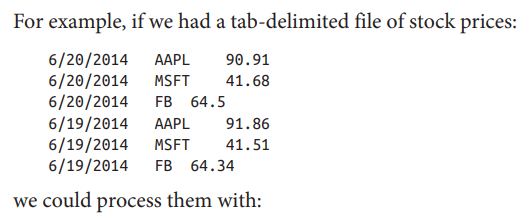

In [490]:
import csv
with open('tab_delimited_stock_prices.txt', 'rb') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        date = row[0]
        symbol = row[1]
        closing_price = float(row[2])
        process(date, symbol, closing_price)

FileNotFoundError: [Errno 2] No such file or directory: 'tab_delimited_stock_prices.txt'

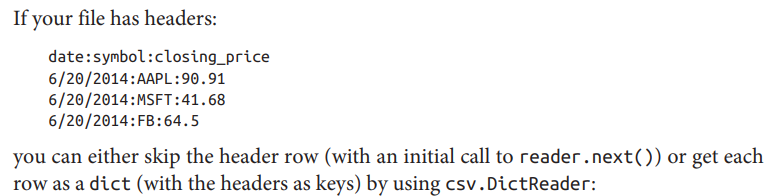

In [494]:
with open('colon_delimited_stock_prices.txt', 'rb') as f:
    reader = csv.DictReader(f, delimiter=':')
    for row in reader:
        date = row["date"]
        symbol = row["symbol"]
        closing_price = float(row["closing_price"])
        process(date, symbol, closing_price)

FileNotFoundError: [Errno 2] No such file or directory: 'colon_delimited_stock_prices.txt'

Even if your file doesn’t have headers you can still use DictReader by passing it the 
keys as a fieldnames parameter.

You can similarly write out delimited data using csv.writer:

In [497]:
today_prices = { 'AAPL' : 90.91, 'MSFT' : 41.68, 'FB' : 64.5 }
with open('comma_delimited_stock_prices.txt','wb') as f
    
 writer = csv.writer(f, delimiter=',
    
 for stock, price in today_prices.items
        :
 writer.writerow([stock, prie])

SyntaxError: unterminated string literal (detected at line 4) (3824834088.py, line 4)

csv.writer will do the right thing if your fields themselves have commas in them.

Your own hand-rolled writer probably won’t. For example, if you attempt:

In [500]:
results = [["test1", "success", "Monday"],
           ["test2", "success, kind of", "Tuesday"],
           ["test3", "failure, kind of", "Wednesday"],
           ["test4", "failure, utter", "Thursday"]]

# don't do this!
with open('bad_csv.txt', 'wb') as f:
    for row in results:
        f.write(",".join(map(str, row))) # might have too many commas in it!
        f.write("\n") # row might have newlines as well!

TypeError: a bytes-like object is required, not 'str'

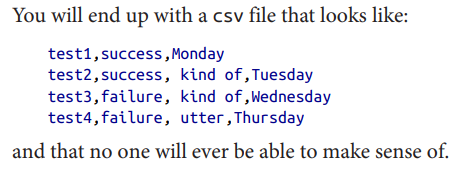

## 9.3 Scrapping the Web

### 9.3.1 HTML and the Parsing Thereof

In [509]:
pip install html5lib

   ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
   --------------------- ------------------ 61.4/112.2 kB 3.2 MB/s eta 0:00:01
   -------------------------------- ------- 92.2/112.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 112.2/112.2 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [518]:
from bs4 import BeautifulSoup
import requests

In [524]:
url = ('https://raw.githubusercontent.com/joelgrus/data/master/getting-data.html')
html = requests.get(url).text
soup = BeautifulSoup(html, 'html5lib')
soup

<!DOCTYPE html>
<html lang="en-US"><head>
    <title>Getting Data</title>
    <meta charset="utf-8"/>
</head>
<body>
    <h1>Getting Data</h1>
    <div class="explanation">
        This is an explanation.
    </div>
    <div class="comment">
        This is a comment.
    </div>
    <div class="content">
        <p id="p1">This is the first paragraph.</p>
        <p class="important">This is the second paragraph.</p>
    </div>
    <div class="signature">
        <span id="name">Joel</span>
        <span id="twitter">@joelgrus</span>
        <span id="email">joelgrus-at-gmail</span>
    </div>


</body></html>

In [530]:
first_paragraph = soup.find('p')
first_paragraph

<p id="p1">This is the first paragraph.</p>

In [528]:
first_paragraph_text = soup.find('p').text
first_paragraph_text

'This is the first paragraph.'

In [534]:
first_paragraph_words = soup.find('p').text.split()
first_paragraph_words

['This', 'is', 'the', 'first', 'paragraph.']

In [536]:
first_paragraph_id = soup.find('p')['id']
first_paragraph_id

'p1'

In [538]:
first_paragraph_id2 = soup.find('p').get('id')
first_paragraph_id2

'p1'

In [542]:
all_paragraphes = soup.find_all('p')
paragraphs_wth_ids = [p for p in soup.find('p') if soup.find('p').get('id')]
paragraphs_wth_ids

['This is the first paragraph.']

In [544]:
important_paragraphs = soup('p', {'class' : 'important'})
important_paragraphs2 = soup('p', 'important')
important_paragraphs3 = [p for p in soup('p')
                         if 'important' in p.get('class', [])]

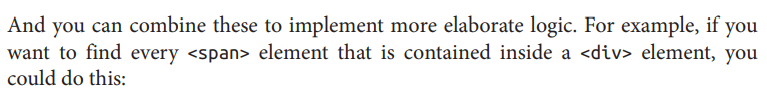is

In [552]:
# warning, will return the same span multiple times
# if it sits inside multiple divs
# be more clever if that's the case
spans_inside_divs = [span
                     for div in soup('div') # for each <div> on the page
                     for span in div('span')] # find each <span> inside it

spans_inside_divs

[<span id="name">Joel</span>,
 <span id="twitter">@joelgrus</span>,
 <span id="email">joelgrus-at-gmail</span>]

### 9.3.2 Сongress Еracking

In [563]:
url = ('https://www.house.gov/representatives')
text = requests.get(url).text
soup = BeautifulSoup(text, 'html5lib')

all_urls = [a['href'] for a in soup('a') if a.has_attr('href')]

print(len(all_urls)) 

967


In [567]:
import re

# must begin with http:// or https://
# must end with .house.gov or .house.gov/

regex = r"^https?://.*\.house.gov/?$"

re.match(regex, "http://joel.house.gov")

<re.Match object; span=(0, 21), match='http://joel.house.gov'>

In [571]:
good_urls = [url for url in all_urls if re.match(regex, url)]
len(good_urls)

872

In [573]:
# delete duplicates
good_urls = list(set(good_urls))
len(good_urls)

436

...

## 9.4 Isung APIs

### 9.4.1 JSON (and XML)

In [583]:
import json

serialized = """{ "title" : "Data Science Book", 
                "author" : "Joel Grus",
                 "publicationYear" : 2014,
                 "topics" : [ "data", "science", "data science"] }"""

# parse the JSON to create a Python dict
deserialized = json.loads(serialized)

if "data science" in deserialized["topics"]:
    print(deserialized)

{'title': 'Data Science Book', 'author': 'Joel Grus', 'publicationYear': 2014, 'topics': ['data', 'science', 'data science']}


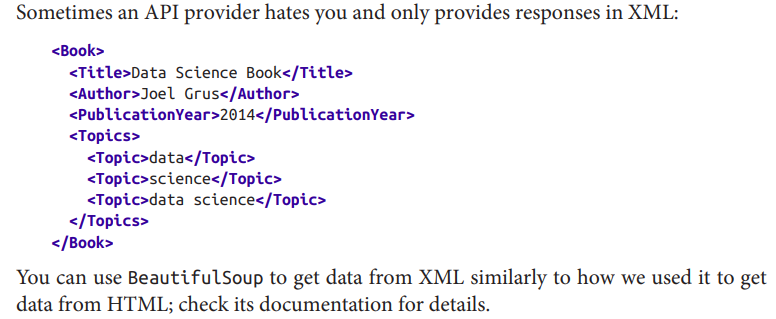

### 9.4.2 Using an Unauthenticated API

Most APIs these days require you to first authenticate yourself in order to use them.

In [588]:
import requests, json

github_user = 'joelgrus'
endpoint = f"https://api.github.com/users/{github_user}/repos"
repos = json.loads(requests.get(endpoint).text)

repos

[{'id': 112873601,
  'node_id': 'MDEwOlJlcG9zaXRvcnkxMTI4NzM2MDE=',
  'name': 'advent2017',
  'full_name': 'joelgrus/advent2017',
  'private': False,
  'owner': {'login': 'joelgrus',
   'id': 1308313,
   'node_id': 'MDQ6VXNlcjEzMDgzMTM=',
   'avatar_url': 'https://avatars.githubusercontent.com/u/1308313?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/joelgrus',
   'html_url': 'https://github.com/joelgrus',
   'followers_url': 'https://api.github.com/users/joelgrus/followers',
   'following_url': 'https://api.github.com/users/joelgrus/following{/other_user}',
   'gists_url': 'https://api.github.com/users/joelgrus/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/joelgrus/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/joelgrus/subscriptions',
   'organizations_url': 'https://api.github.com/users/joelgrus/orgs',
   'repos_url': 'https://api.github.com/users/joelgrus/repos',
   'events_url': 'https://api.github.com/users/j

In [590]:
# data analayse ( for UNICODE format dates)
pip install python-dateutil

Note: you may need to restart the kernel to use updated packages.


In [592]:
from dateutil.parser import parse

dates = [parse(repo["created_at"]) for repo in repos]
month_counts = Counter(date.month for date in dates)
weekday_counts = Counter(date.weekday() for date in dates)

In [594]:
last_5_repositories = sorted(repos,
                             key=lambda r: r["created_at"],
                             reverse=True)[:5]
last_5_languages = [repo["language"]
                    for repo in last_5_repositories]

### 9.4.3 Finding APIs

## 9.5 Example: Using the Twitter APIs

...

# 10 Working with Data

## 10.1 Exploring Your Data

### 10.1.1 Exploring One-Dimensional Data

In [602]:
from typing import List, Dict
from collections import Counter
import math
import matplotlib.pyplot as plt


def bucketize(point: float, bucket_size: float) -> float:
    """floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)
    
def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)
    
def plot_histogram(points: List[float], bucket_size: float, title: str =""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

In [606]:
import random

def inverse_normal_cdf(p: float,
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
    """Find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z = -10.0                      # normal_cdf(-10) is (very close to) 0
    hi_z  =  10.0                      # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # Consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            low_z = mid_z              # Midpoint too low, search above it
        else:
            hi_z = mid_z               # Midpoint too high, search below it

    return mid_z

random.seed(0)

# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range (10_000)]
print(uniform)

# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]
print(normal)

[68.88437030500961, 51.590880588060486, -15.885683833830996, -48.21664994140733, 2.254944273721705, -19.01317250991714, 56.75971780695451, -39.33745478421451, -4.680609169528836, 16.676407891006235, 81.62257703906704, 0.9373711634780477, -43.63243112005924, 51.16084083144477, 23.67379933506632, -49.898731727511894, 81.94925119364802, 96.55709520753061, 62.04344719931791, 80.43319008791653, -37.970486136133474, 45.96634965202574, 79.7676575935987, 36.79678638308826, -5.571456909457325, -79.85975838632683, -13.165632909243257, 22.177394688760316, 82.60221064757965, 93.32127355415176, -4.5980446894566, 73.061985554328, -47.90153792160812, 61.005565402604475, 9.739860767117861, -97.19165996719622, 43.94093728079082, -20.235291555146247, 64.96899542964661, 33.63064024637018, -99.77143613711435, -1.284426706935065, 73.52055509855617, -51.2178246225736, -34.95912745052199, 74.09424642173093, -61.78658169952189, 13.50214812413438, -52.27681427695596, 93.50805005802866, 60.63589385597402, -10.4

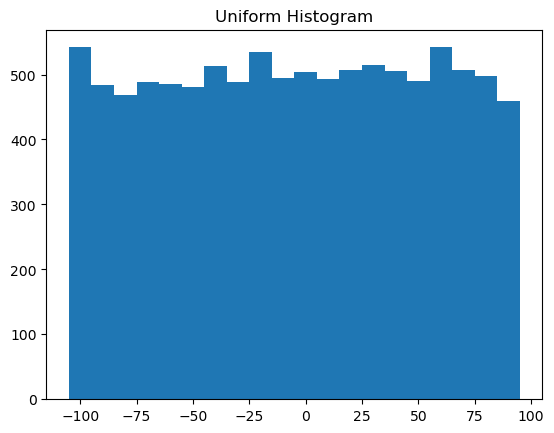

In [608]:
plot_histogram(uniform, 10, "Uniform Histogram")

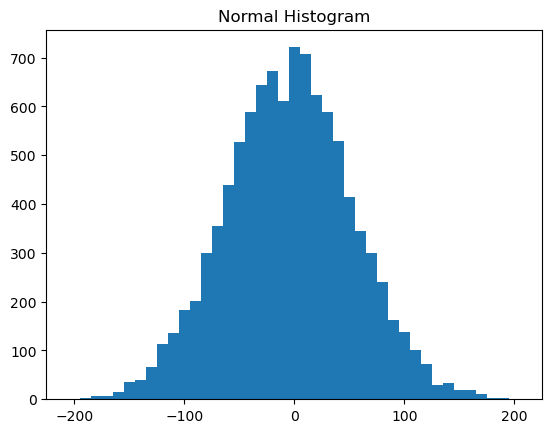

In [612]:
plot_histogram(normal, 10, "Normal Histogram")

### 10.1.2 Two Dimensions

Scatter plot

In [618]:
def random_normal():
    """returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

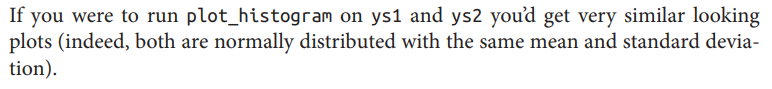  
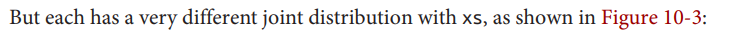  

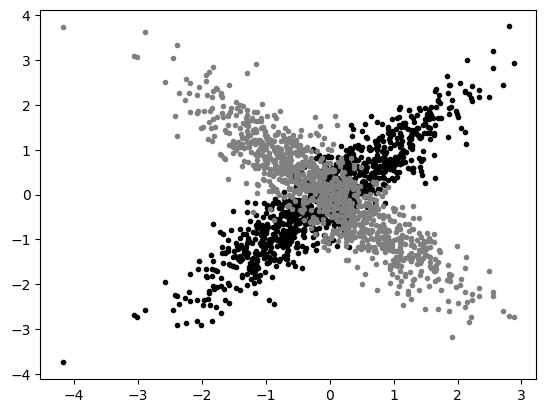

In [625]:
plt.scatter(xs, ys1, marker =".", color = 'black', label ='ys1')
plt.scatter(xs, ys2, marker =".", color = 'gray', label ='ys2')

In [641]:
# This difference would also be apparent if you looked at the correlations:
def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"
    return sum(v_i * w_i for v_i, w_i in zip(v, w))
    
def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"
    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0    # if no variation, correlation is zero


print(correlation(xs, ys1)) # 0.9
print(correlation(xs, ys2)) # -0.9

0.9010493686379609
-0.8920981526880033


### 10.1.3 Many Dimensions

With many dimensions, you’d like to know how all the dimensions relate to one 
another. A simple approach is to look at the correlation matrix, in which the entry i 
row i and column j is the correlation between the ith dimension and the jth dim‐
sion of the data:

In [650]:
Vector = List[float]

Matrix = List[List[float]]

def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
    """
    Returns a num_rows x num_cols matrix
    whose (i,j)-th entry is entry_fn(i, j)
    """
    return [[entry_fn(i, j)             # given i, create a list
             for j in range(num_cols)]  #   [entry_fn(i, 0), ... ]
            for i in range(num_rows)]   # create one list for each i


def correlation_matrix(data: List[Vector]) -> Matrix:
    """returns the num_columns x num_columns matrix whose (i, j)th entry
    is the correlation between columns i and j of data"""
    def matrix_entry(i: int, j: int) -> float:
        return correlation_ij(data[i], data[j])
    return make_matrix(len(data), len(data), correlation_ij)

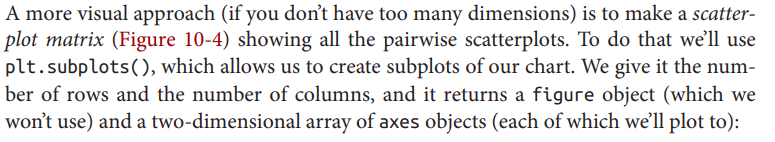

In [655]:
# corr_data is a list of 4 100-dimensional vectors
num_vectors = len(corr_data)
fig, ax = plt.subplots(num_vectors, num_vectors)

for i in range(num_vectors):
    for j in range(num_vectors):
        # scatter column_j on the x-axis vs column_i on the y-axis
        if i != j: ax[i][j].scatter(corr_data[j], corr_data[i])
            
        # unless i == j, in which case show the series name
        else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                                xycoords='axes fraction',
                                ha="center", va="center")
            
        # then hide axis labels except left and bottom charts
        if i < num_columns - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)
            
    # fix the bottom right and top left axis labels, which are wrong because
    # their charts only have text in them
    ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
    ax[0][0].set_ylim(ax[0][1].get_ylim())
    
plt.show()

NameError: name 'corr_data' is not defined

...

## 10.2 Using typed named tuples

In [665]:
from collections import namedtuple
import datetime

StockPrice = namedtuple('StockPrice', ['symbol', 'date', 'closing_price'])
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.3)
price

StockPrice(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=106.3)

In [680]:
from typing import NamedTuple

class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float
    
    def is_high_tech(self) -> bool:
        """ it's a class so we can also add methods """
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.3)
price

StockPrice(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=106.3)

## 10.3 dataclasses class of data

In [682]:
from dataclasses import dataclass

@dataclass
class StockPrice2:
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        """ it's a class so we can also add methods """
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price2 = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.3)
price2

StockPrice(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=106.3)

The difference is we can modify values of class

In [690]:
price2 = closing_price / 2
price2

NameError: name 'closing_price' is not defined

...

## 10.4 Cleaning and Munging

In [702]:
from dateutil.parser import parse

def parse_row(row: List[str]) -> StockPrice:
    symbol, date, closing_price = row
    return StockPrice(symbol = symbol, date = parse(date).date(), closing_price = float(closing_price))

stock = parse_row(['MSFT', '2018-12-14', '106.03'])
stock

StockPrice(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=106.03)

What if there’s bad data? A “float” value that doesn’t actually represent a number? 
We’d usually rather get a None than crash our program. We can do this with a helpe 
function:

In [711]:
from typing import Optional
import re

def try_pare_row(row: List[str]) -> Optional[StockPrice]:
    symbol, date_, closing_price_ = row
    if not re.match(r"^[A-Z]+$", symbol):
        return None

    try:
        date = parse(date_).date()
    except ValueError:
        return None

    try:
        closing_price = float(closing_price_)
    except ValueError:
        return None

    return StockPrice(symbol, date, closing_price)

try_pare_row(['MSFT', '2018-12-14', '106.03'])

StockPrice(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=106.03)

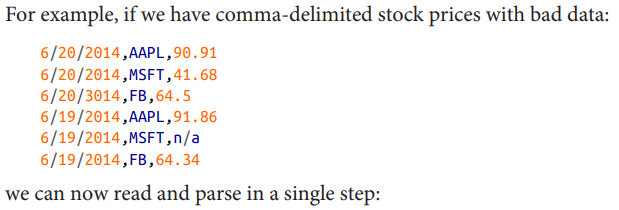

In [716]:
import csv

data: List[StockPrice] = []

with open("comma_delimeted_stock_prices.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        maybe_stock = try_parse_row(row)
        if maybe_stock is None:
            print(f"skip: {row}")
        else:
            data.append(maybe_stock)

FileNotFoundError: [Errno 2] No such file or directory: 'comma_delimeted_stock_prices.csv'

## 10.5 Manipulating Data

...

## 10.6 Remark: tqdm libriary

inidcator of completion (in %) of a loop

In [726]:
import tqdm

for i in tqdm.tqdm(range(100)):
    " do something slow "
    _ = [random.random() for _ in range (1_000_000)]

100%|██████████| 100/100 [00:06<00:00, 15.01it/s]


...

## 10.7 Dimensionality Reduction

...

# 11 Machine Learning

## 11.1 Modeling

## 11.2 What Is Machine Learning?

## 11.3 Overfitting and Underfitting

Overfitting  
Definition: Overfitting happens when a machine learning model learns the details and noise in the training data to an extent that it performs very well on this data but fails to generalize to new, unseen data.  
Analogy: Think of it like memorizing answers to specific questions rather than understanding the concepts. You do well on those exact questions (training data), but struggle with new questions (new data).
Indicators: High accuracy on training data but poor performance on validation/testing data.  
Example: Imagine a student memorizing the exact wording of a few essay questions rather than understanding how to write essays. They score perfectly on those exact essays but can't handle any variations in the questions.
 
Underfitting  
Definition: Underfitting occurs when a model is too simple to capture the underlying patterns in the data. As a result, it performs poorly on both the training data and new data.  
Analogy: It's like a student who doesn't study enough and only has a vague idea of the subject. They don’t do well on any questions, whether they’ve seen them before or not.  
Indicators: Poor performance on both training and validation/testing data.  
Example: Imagine a student who only reads the titles of chapters in their textbook and tries to answer essay questions. They lack the detail needed to answer any quest

In [752]:
import random
from typing import TypeVar, List, Tuple

X = TypeVar('X') # generic type to represent a data point

def split_data(data: List[X], prob: float) -> Tuple[List[X], List[X]]:
    """ Split data into parts [prob, 1 - prob] """
    data = data[:]
    random.shuffle(data)
    cut = int(len(data) * prob)
    return data[:cut], data[cut:]

data = [n for n in range(1_000)]
train, test = split_data(data, 0.75)

In [758]:
Y = TypeVar('Y') # generic type to represent an output data point

def train_test_split(xs: List[X], ys: List[Y], test_pct: float) -> Tuple[List[X], List[X], List[Y], List[Y]]:
    # generate indexes and split them
    idxs = [i for i in range(len(xs))]
    train_idxs, test_idxs = split_data(idxs, 1 - test_pct)

    return ([xs[i] for i in train_idxs], # training x_train
            [xs[i] for i in test_idxs], # test x_test
            [ys[i] for i in train_idxs], # training y_train
            [ys[i] for i in test_idxs]) # test y_test
    
xs = [x for x in range(1_000)]
ys = [2 * x for x in xs]
x_train, x_test, y_train, y_test = train_test_split(xs, ys, 0.25)

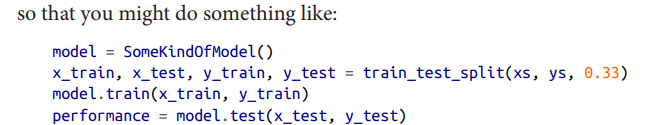

## 11.4 Correctness

True Positive (TP)  
Definition: These are cases where the model correctly predicts the positive class.  
Example: If a medical test correctly identifies a patient with a disease as having the disease, that's a true positive.

True Negative (TN)  
Definition: These are cases where the model correctly predicts the negative class.  
Example: If the medical test correctly identifies a healthy person as not having the disease, that's a true negative.

False Positive (FP)  "Type I error."  
Definition: These are cases where the model incorrectly predicts the positive class.  
Example: If the medical test incorrectly identifies a healthy person as having the disease, that's a false positive. This is also known as a 

False Negative (FN)  known as a "Type II error."  
Definition: These are cases where the model incorrectly predicts the negative class.  
Example: If the medical test incorrectly identifies a person with the disease as not having the disease, that's a false negative. This is also 

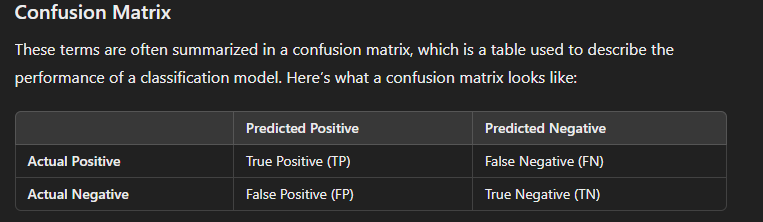

data:  
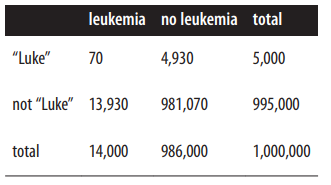

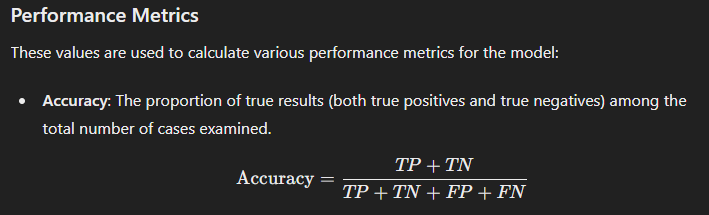

In [777]:
def accuracy(tp: int, fp: int,fn: int, tn: int) -> float:
    correct = tp + tn
    total = tp + fp + fn + tn
    return correct/total

accuracy(70, 4_930, 13_930, 981_070)

0.98114

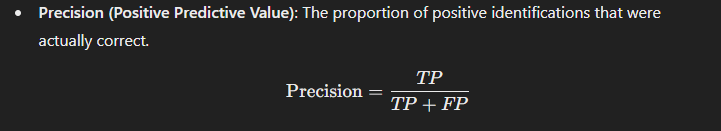

In [782]:
def precision (tp: int, fp: int,fn: int, tn: int) -> float:
    return tp/(tp+fp)

precision(70, 4_930, 13_930, 981_070)

0.014

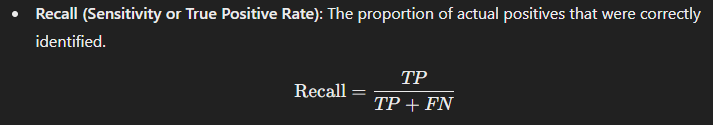

In [787]:
def recall(tp: int, fp: int,fn: int, tn: int) -> float:
    return tp/(tp+fn)

recall(70, 4_930, 13_930, 981_070)

0.005

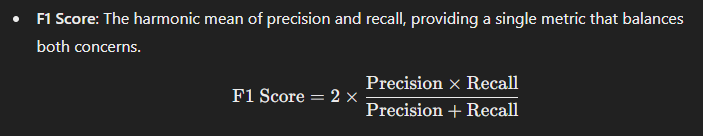

In [790]:
def f1_score(tp: int, fp: int,fn: int, tn: int) -> float:
    p = precision(tp, fp, tn, fn)
    r = recall(tp, fp, tn, fn)
    return 2 * p * r/ (p + r)

f1_score(70, 4_930, 13_930, 981_070)

0.00014196767193299124

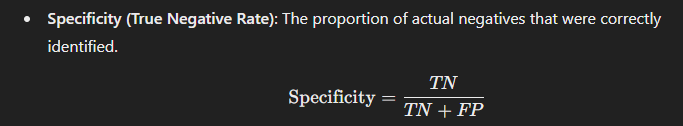

In [793]:
def specificity(tp: int, fp: int,fn: int, tn: int) -> float:
    return tn / (tn + fp)

specificity(70, 4_930, 13_930, 981_070)

0.995

## 11.5 The Bias-Variance Trade-of

The bias-variance trade-off is a fundamental concept in machine learning that describes the trade-off between two sources of error that affect the performance of predictive models: bias and variance. Understanding this trade-off is essential for building models that generalize well to new, unseen data.

Bias  
Definition: Bias refers to the error introduced by approximating a real-world problem, which may be complex, by a simplified model.  
Characteristics:  
High Bias: Models with high bias are often too simple to capture the underlying patterns in the data, leading to systematic errors. This is known as underfitting.  
Low Bias: Models with low bias can better capture the complexity of the data, reducing systematic errors.  
Example: A linear regression model trying to capture a quadratic relationship will have high bias because it’s too simple to model the quadratic relationship.  

Variance  
Definition: Variance refers to the error introduced by the model’s sensitivity to small fluctuations in the training data.  
Characteristics:  
High Variance: Models with high variance tend to overfit the training data, capturing noise along with the underlying patterns. This leads to poor generalization to new data.  
Low Variance: Models with low variance are more robust to fluctuations in the training data but might miss some of the underlying patterns.  
Example: A highly complex model, like a deep neural network with too many parameters trained on a small dataset, may have high variance and overfit the training data.  


The Trade-off  
The goal is to find a balance between bias and variance that minimizes the total error.  

Underfitting (High Bias, Low Variance): Simple models that don't capture the complexity of the data well.  
Error mainly due to bias.  
Example: Linear regression on non-linear data.  

Overfitting (Low Bias, High Variance): Complex models that fit the training data too closely, capturing noise as well as the signal.  
Error mainly due to variance.  
Example: A deep neural network with many layers trained on a small dataset.  

Optimal Model (Balanced Bias and Variance): A model that captures the underlying patterns in the data while being robust to noise.  
Balanced trade-off leads to the best generalization performance on new data.  

Visual Representation
Imagine a target with a bullseye:  
High Bias, Low Variance: Shots are consistently off target in the same direction (systematic error).  
Low Bias, High Variance: Shots are widely scattered but some may hit the bullseye (high variability).  
High Bias, High Variance: Shots are off target and scattered.  
Low Bias, Low Variance: Shots are consistently hitting the bullseye (ideal scenario).  

Practical Strategies to Address the Trade-off  
Model Complexity: Choose a model that has the right level of complexity for the data.  
Regularization: Techniques like Lasso, Ridge, and Dropout add penalties to model parameters to reduce variance without increasing bias excessively.  
Cross-Validation: Use techniques like k-fold cross-validation to ensure the model generalizes well to unseen data.  
Ensemble Methods: Techniques like bagging, boosting, and stacking can reduce variance by combining multiple models.  


Summary  
Bias: Error due to overly simplistic assumptions in the learning algorithm.  
Variance: Error due to excessive sensitivity to small fluctuations in the training set.  
Trade-off: Balancing bias and variance to minimize total error and improve model generalization.  

## 11.6 Feature Extraction and Selection

...

# 12 k-Nearest Neighbors

## 12.1 The Model

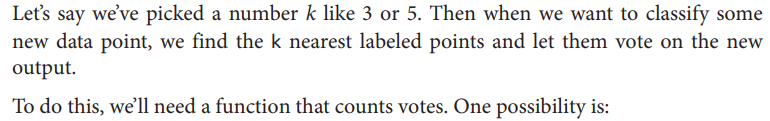

In [809]:
def row_majority_vote(labels: List[str]) -> str:
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

row_majority_vote(['a', 'b', 'c', 'b'])

'b'